In [64]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
import statsmodels.api as sm
import pylab
from scipy import stats
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('Wholesale+Customers+Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [4]:
df.describe()

Buyer/Spender          Fresh          Milk       Grocery        Frozen  \
count     440.000000     440.000000    440.000000    440.000000    440.000000   
mean      220.500000   12000.297727   5796.265909   7951.277273   3071.931818   
std       127.161315   12647.328865   7380.377175   9503.162829   4854.673333   
min         1.000000       3.000000     55.000000      3.000000     25.000000   
25%       110.750000    3127.750000   1533.000000   2153.000000    742.250000   
50%       220.500000    8504.000000   3627.000000   4755.500000   1526.000000   
75%       330.250000   16933.750000   7190.250000  10655.750000   3554.250000   
max       440.000000  112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

In [5]:
df.head()

Buyer/Spender Channel Region  Fresh  Milk  Grocery  Frozen  \
0              1  Retail  Other  12669  9656     7561     214   
1              2  Retail  Other   7057  9810     9568    1762   
2              3  Retail  Other   6353  8808     7684    2405   
3              4   Hotel  Other  13265  1196     4221    6404   
4              5  Retail  Other  22615  5410     7198    3915   

   Detergents_Paper  Delicatessen  
0              2674          1338  
1              3293          1776  
2              3516          7844  
3               507          1788  
4              1777          5185

1.1. Use methods of descriptive statistics to summarize data.
Which Region and which Channel seems to spend more?
Which Region and which Channel seems to spend less?

In [6]:
df['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [7]:
df_sum = df.drop(columns ='Buyer/Spender').groupby('Region').sum().reset_index()
df_sum

Region    Fresh     Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  Lisbon   854833   422454   570037  231026            204136        104327
1  Oporto   464721   239144   433274  190132            173311         54506
2   Other  3960577  1888759  2495251  930492            890410        512110

In [8]:
df_sum.sum(axis=1)

0     2386813
1     1555088
2    10677599
dtype: int64

In [9]:
df_sum['Total Amount Spent'] = df_sum.sum(axis=1)
df_sum

Region    Fresh     Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  \
0  Lisbon   854833   422454   570037  231026            204136        104327   
1  Oporto   464721   239144   433274  190132            173311         54506   
2   Other  3960577  1888759  2495251  930492            890410        512110   

   Total Amount Spent  
0             2386813  
1             1555088  
2            10677599

In [10]:
df_mean = df.drop(columns ='Buyer/Spender').groupby('Region').mean().reset_index()
df_mean

Region         Fresh         Milk      Grocery       Frozen  \
0  Lisbon  11101.727273  5486.415584  7403.077922  3000.337662   
1  Oporto   9887.680851  5088.170213  9218.595745  4045.361702   
2   Other  12533.471519  5977.085443  7896.363924  2944.594937   

   Detergents_Paper  Delicatessen  
0       2651.116883   1354.896104  
1       3687.468085   1159.702128  
2       2817.753165   1620.601266

In [11]:
df_mean['Mean Expenditure'] = df_mean.mean(axis=1)
df_mean

Region         Fresh         Milk      Grocery       Frozen  \
0  Lisbon  11101.727273  5486.415584  7403.077922  3000.337662   
1  Oporto   9887.680851  5088.170213  9218.595745  4045.361702   
2   Other  12533.471519  5977.085443  7896.363924  2944.594937   

   Detergents_Paper  Delicatessen  Mean Expenditure  
0       2651.116883   1354.896104       5166.261905  
1       3687.468085   1159.702128       5514.496454  
2       2817.753165   1620.601266       5631.645042

<AxesSubplot:xlabel='Region', ylabel='Total Amount Spent'>

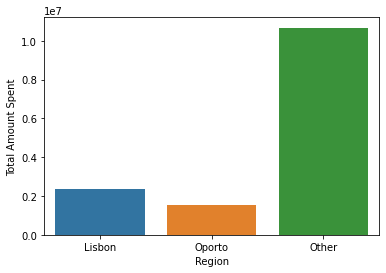

In [12]:
sns.barplot(x='Region',y='Total Amount Spent', data=df_sum)

<AxesSubplot:xlabel='Region', ylabel='Mean Expenditure'>

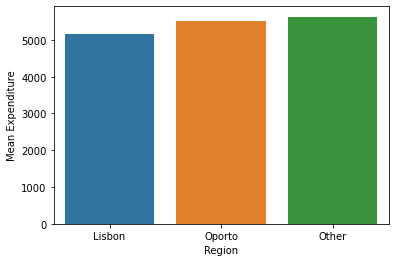

In [13]:
sns.barplot(x='Region',y='Mean Expenditure', data=df_mean)

In [14]:
df['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [15]:
df_sum = df.drop(columns ='Buyer/Spender').groupby('Channel').sum().reset_index()
df_sum

Channel    Fresh     Milk  Grocery   Frozen  Detergents_Paper  Delicatessen
0   Hotel  4015717  1028614  1180717  1116979            235587        421955
1  Retail  1264414  1521743  2317845   234671           1032270        248988

In [16]:
df_sum.sum(axis=1)

0    7999569
1    6619931
dtype: int64

In [17]:
df_sum['Total Amount Spent'] = df_sum.sum(axis=1)
df_sum

Channel    Fresh     Milk  Grocery   Frozen  Detergents_Paper  Delicatessen  \
0   Hotel  4015717  1028614  1180717  1116979            235587        421955   
1  Retail  1264414  1521743  2317845   234671           1032270        248988   

   Total Amount Spent  
0             7999569  
1             6619931

In [18]:
df_mean = df.drop(columns ='Buyer/Spender').groupby('Channel').mean().reset_index()
df_mean

Channel         Fresh          Milk       Grocery       Frozen  \
0   Hotel  13475.560403   3451.724832   3962.137584  3748.251678   
1  Retail   8904.323944  10716.500000  16322.852113  1652.612676   

   Detergents_Paper  Delicatessen  
0        790.560403   1415.956376  
1       7269.507042   1753.436620

In [19]:
df_mean['Mean Expenditure'] = df_mean.sum(axis=1)
df_mean

Channel         Fresh          Milk       Grocery       Frozen  \
0   Hotel  13475.560403   3451.724832   3962.137584  3748.251678   
1  Retail   8904.323944  10716.500000  16322.852113  1652.612676   

   Detergents_Paper  Delicatessen  Mean Expenditure  
0        790.560403   1415.956376      26844.191275  
1       7269.507042   1753.436620      46619.232394

<AxesSubplot:xlabel='Channel', ylabel='Total Amount Spent'>

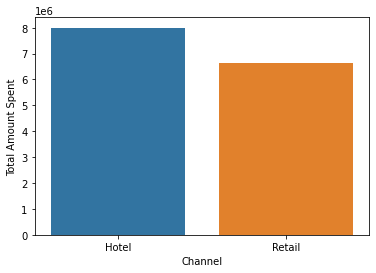

In [20]:
sns.barplot(x='Channel',y='Total Amount Spent', data=df_sum)

<AxesSubplot:xlabel='Channel', ylabel='Mean Expenditure'>

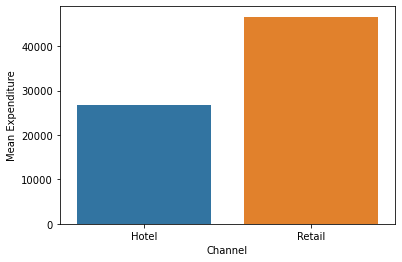

In [21]:
sns.barplot(x='Channel',y='Mean Expenditure', data=df_mean)

1.2. There are 6 different varieties of items are considered.
Do all varieties show similar behaviour across Region and Channel?

<AxesSubplot:xlabel='Region', ylabel='Delicatessen'>

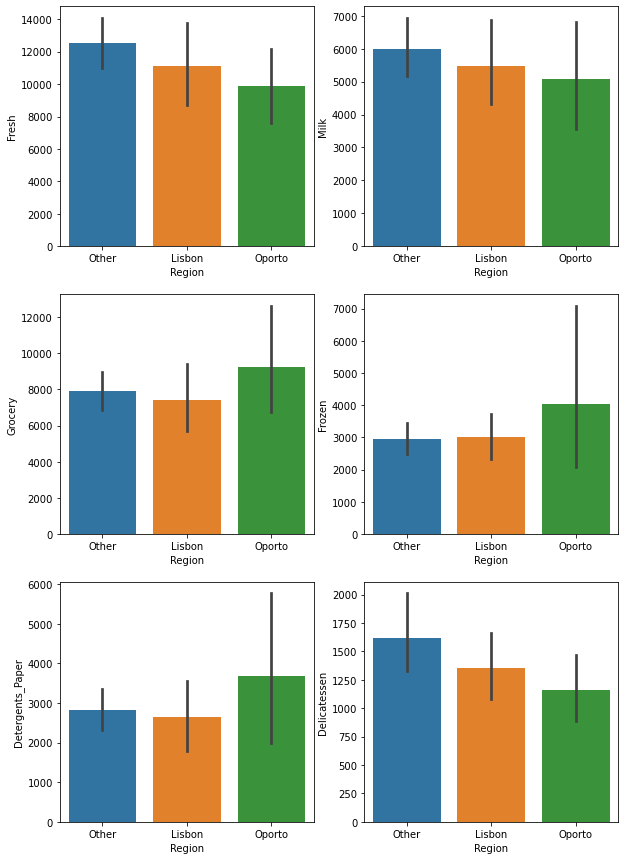

In [53]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
sns.barplot(x='Region',y='Fresh',data=df, ax = axes[0,0])
sns.barplot(x='Region',y='Milk',data=df, ax = axes[0,1])
sns.barplot(x='Region',y='Grocery',data=df, ax = axes[1,0])
sns.barplot(x='Region',y='Frozen',data=df, ax = axes[1,1])
sns.barplot(x='Region',y='Detergents_Paper',data=df, ax = axes[2,0])
sns.barplot(x='Region',y='Delicatessen',data=df, ax = axes[2,1])

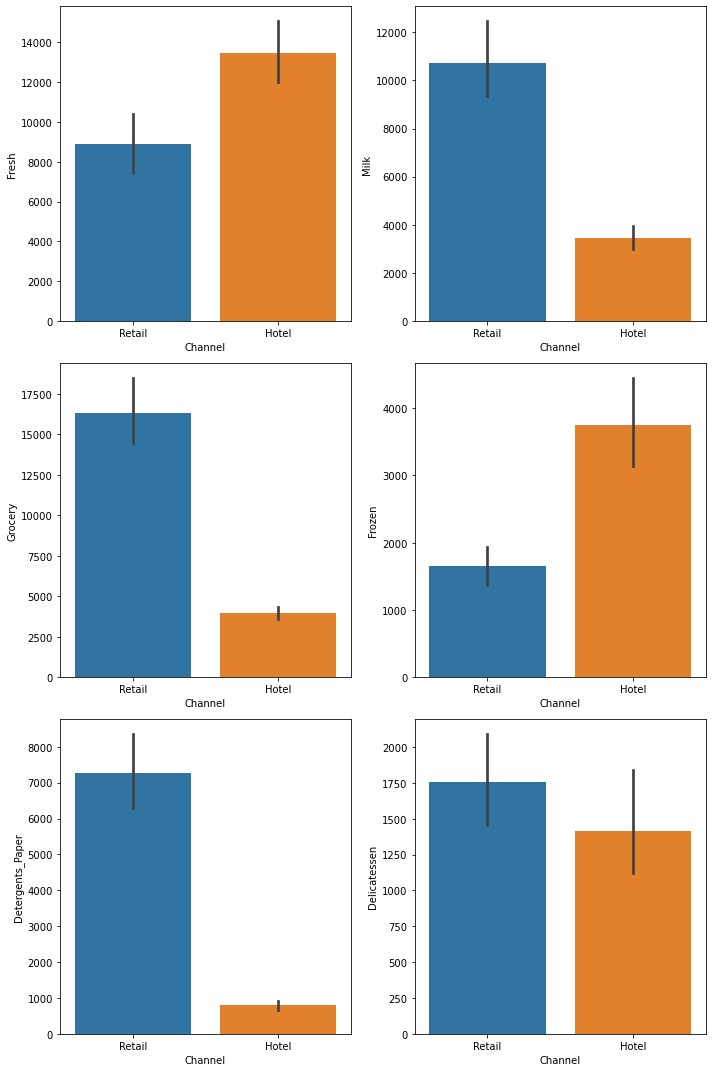

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
sns.barplot(x='Channel',y='Fresh',data=df, ax = axes[0,0])
sns.barplot(x='Channel',y='Milk',data=df, ax = axes[0,1])
sns.barplot(x='Channel',y='Grocery',data=df, ax = axes[1,0])
sns.barplot(x='Channel',y='Frozen',data=df, ax = axes[1,1])
sns.barplot(x='Channel',y='Detergents_Paper',data=df, ax = axes[2,0])
sns.barplot(x='Channel',y='Delicatessen',data=df, ax = axes[2,1])
plt.tight_layout()

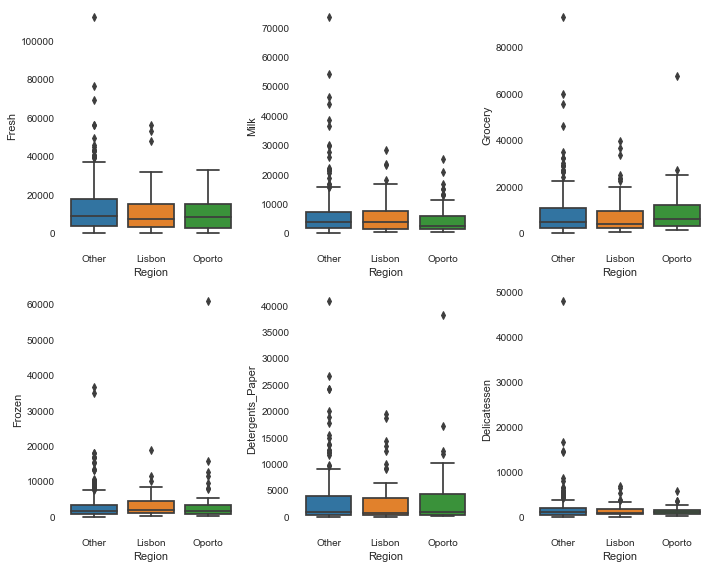

In [73]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
sns.boxplot(x='Region',y='Fresh',data=df, ax = axes[0,0])
sns.boxplot(x='Region',y='Milk',data=df, ax = axes[0,1])
sns.boxplot(x='Region',y='Grocery',data=df, ax = axes[0,2])
sns.boxplot(x='Region',y='Frozen',data=df, ax = axes[1,0])
sns.boxplot(x='Region',y='Detergents_Paper',data=df, ax = axes[1,1])
sns.boxplot(x='Region',y='Delicatessen',data=df, ax = axes[1,2])
plt.tight_layout()

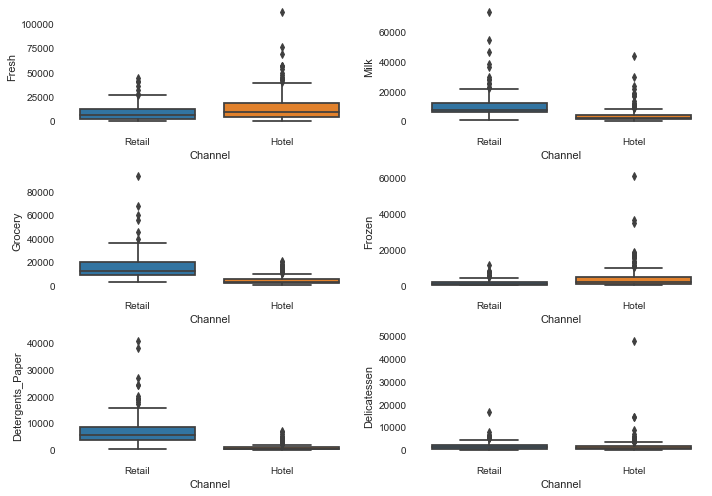

In [74]:
fig, axes = plt.subplots(3, 2, figsize=(10, 7))
sns.boxplot(x='Channel',y='Fresh',data=df, ax = axes[0,0])
sns.boxplot(x='Channel',y='Milk',data=df, ax = axes[0,1])
sns.boxplot(x='Channel',y='Grocery',data=df, ax = axes[1,0])
sns.boxplot(x='Channel',y='Frozen',data=df, ax = axes[1,1])
sns.boxplot(x='Channel',y='Detergents_Paper',data=df, ax = axes[2,0])
sns.boxplot(x='Channel',y='Delicatessen',data=df, ax = axes[2,1])
plt.tight_layout()

<AxesSubplot:>

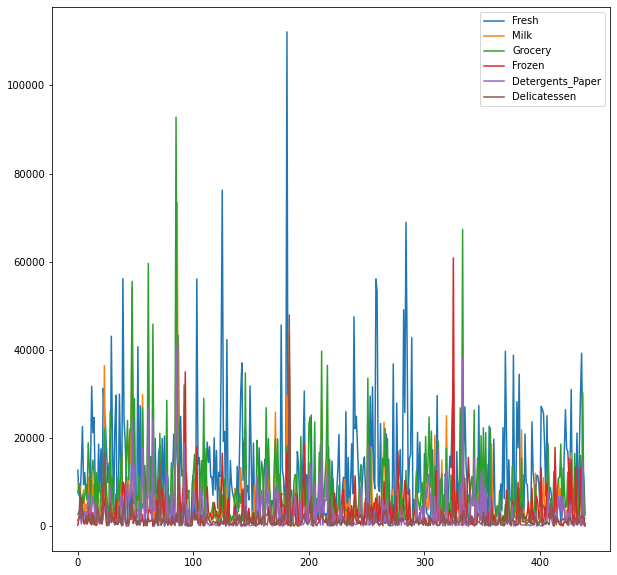

In [62]:
df_bivariate_plot = df.drop(columns='Buyer/Spender')
df_bivariate_plot.plot.line(figsize = (10,10))

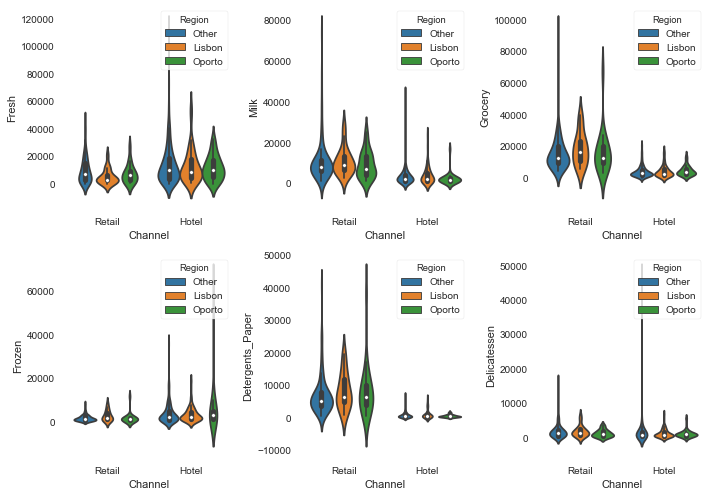

In [82]:
fig, axes = plt.subplots(2,3, figsize=(10, 7))
sns.violinplot(x='Channel',y='Fresh',data=df, hue='Region', ax = axes[0,0])
sns.violinplot(x='Channel',y='Milk',data=df, hue='Region', ax = axes[0,1])
sns.violinplot(x='Channel',y='Grocery',data=df, hue='Region',  ax = axes[0,2])
sns.violinplot(x='Channel',y='Frozen',data=df, hue='Region', ax = axes[1,0])
sns.violinplot(x='Channel',y='Detergents_Paper',data=df, hue='Region', ax = axes[1,1])
sns.violinplot(x='Channel',y='Delicatessen',data=df, hue='Region', ax = axes[1,2])
plt.tight_layout()

1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
Which items shows the least inconsistent behaviour?

In [28]:
cv_Milk = df['Milk'].std()/df['Milk'].mean()
cv_Milk

1.2732985840065414

In [29]:
cv_Fresh = df['Fresh'].std()/df['Fresh'].mean()
cv_Fresh

1.0539179237473149

In [30]:
cv_Grocery = df['Grocery'].std()/df['Grocery'].mean()
cv_Grocery

1.1951743730016824

In [31]:
cv_Frozen = df['Frozen'].std()/df['Frozen'].mean()
cv_Frozen

1.5803323836352914

In [32]:
cv_Detergent = df['Detergents_Paper'].std()/df['Detergents_Paper'].mean()
cv_Detergent

1.6546471385005155

In [33]:
cv_Delicatessen = df['Delicatessen'].std()/df['Delicatessen'].mean()
cv_Delicatessen

1.8494068981158382

In [36]:
Range_Milk = df['Milk'].max() - df['Milk'].min()
Range_Milk

73443

In [37]:
Range_Fresh = df['Fresh'].max() - df['Fresh'].min()
Range_Fresh

112148

In [38]:
Range_Grocery = df['Grocery'].max() - df['Grocery'].min()
Range_Grocery

92777

In [40]:
Range_Frozen = df['Frozen'].max() - df['Frozen'].min()
Range_Frozen

60844

In [41]:
Range_Detergents = df['Detergents_Paper'].max() - df['Detergents_Paper'].min()
Range_Detergents

40824

In [42]:
Range_Delicatessen = df['Delicatessen'].max() - df['Delicatessen'].min()
Range_Delicatessen

47940

In [45]:
Q1 = df['Milk'].quantile(0.25)
Q3 = df['Milk'].quantile(0.75)
IQR = Q3 - Q1
IQR

5657.25

In [46]:
Q1 = df['Fresh'].quantile(0.25)
Q3 = df['Fresh'].quantile(0.75)
IQR = Q3 - Q1
IQR

13806.0

In [47]:
Q1 = df['Grocery'].quantile(0.25)
Q3 = df['Grocery'].quantile(0.75)
IQR = Q3 - Q1
IQR

8502.75

In [48]:
Q1 = df['Frozen'].quantile(0.25)
Q3 = df['Frozen'].quantile(0.75)
IQR = Q3 - Q1
IQR

2812.0

In [49]:
Q1 = df['Detergents_Paper'].quantile(0.25)
Q3 = df['Detergents_Paper'].quantile(0.75)
IQR = Q3 - Q1
IQR

3665.25

In [50]:
Q1 = df['Delicatessen'].quantile(0.25)
Q3 = df['Delicatessen'].quantile(0.75)
IQR = Q3 - Q1
IQR

1412.0

In order to determine the inconsistent behaviour of all the 6 items, we need to test the measure of variability, in this case we will find out the coefficient of variation.By comparing the same, we can see that Delicatessen has the highest coefficient of variation. This allows us to conclude that Delicatessen is the item which is most inconsistent in its behaviour.
Similarly, Fresh has the lowest coefficient of variation, hence Fresh is the least inconsistent in its behaviour.

1.4. Are there any outliers in the data?

<AxesSubplot:>

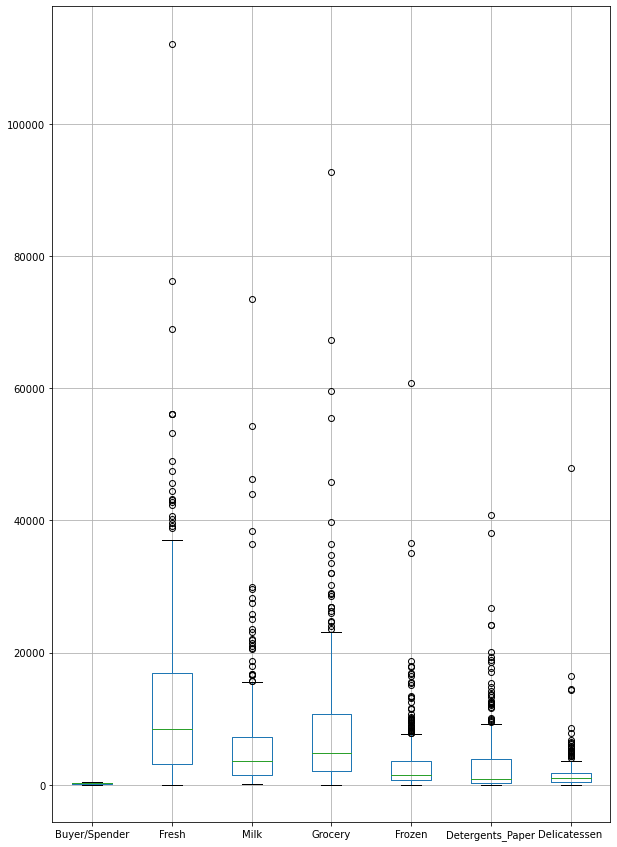

In [34]:
plt.figure(figsize=(10,15))
df.boxplot()

<AxesSubplot:>

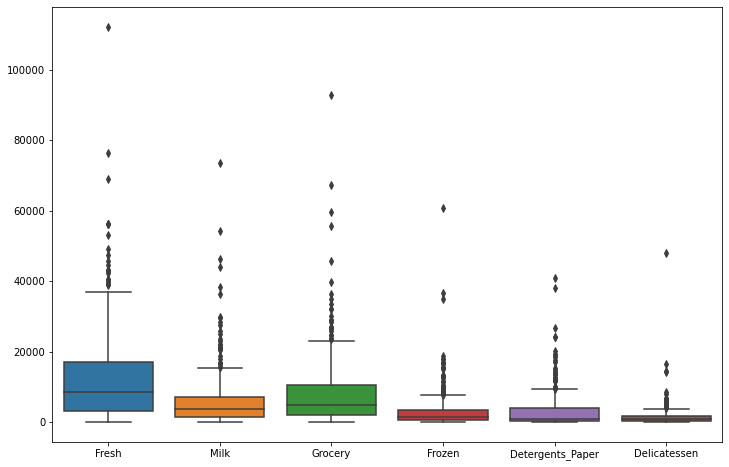

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df.drop('Buyer/Spender',axis=1))

From the above plot, it can be concluded that apart from 'Buyer/Sender' all other column variables consists of multiple outliers.

1.5. On the basis of this report, what are the recommendations?

In [65]:
report = ProfileReport(df)

In [66]:
report.to_file('report.html')

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [67]:
report